In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import clone
from sklearn.datasets import make_classification


In [7]:
train = pd.read_csv('train(2).csv')
test = pd.read_csv('test(2).csv')
display(train.info())
display(test.info())
display(train.head())
display(test.head())
display(train.shape)
display(test.shape)
display(train.columns.tolist())
display(test.columns.tolist())
display(train.isnull().sum())
display(test.isnull().sum())
display( train.describe())
display( test.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  int64  
 1   age                  15000 non-null  float64
 2   height(cm)           15000 non-null  float64
 3   weight(kg)           15000 non-null  float64
 4   waist(cm)            15000 non-null  float64
 5   eyesight(left)       15000 non-null  float64
 6   eyesight(right)      15000 non-null  float64
 7   hearing(left)        15000 non-null  float64
 8   hearing(right)       15000 non-null  float64
 9   systolic             15000 non-null  float64
 10  relaxation           15000 non-null  float64
 11  fasting blood sugar  15000 non-null  float64
 12  Cholesterol          15000 non-null  float64
 13  triglyceride         15000 non-null  float64
 14  HDL                  15000 non-null  float64
 15  LDL                  15000 non-null 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   height(cm)           10000 non-null  float64
 3   weight(kg)           10000 non-null  float64
 4   waist(cm)            10000 non-null  float64
 5   eyesight(left)       10000 non-null  float64
 6   eyesight(right)      10000 non-null  float64
 7   hearing(left)        10000 non-null  float64
 8   hearing(right)       10000 non-null  float64
 9   systolic             10000 non-null  float64
 10  relaxation           10000 non-null  float64
 11  fasting blood sugar  10000 non-null  float64
 12  Cholesterol          10000 non-null  float64
 13  triglyceride         10000 non-null  float64
 14  HDL                  10000 non-null  float64
 15  LDL                  10000 non-null  

None

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55.0,150.0,50.0,73.0,0.8,1.0,1.0,1.0,122.0,...,62.0,113.0,12.0,1.0,0.6,22.0,21.0,12.0,0.0,0.0
1,1,50.0,160.0,60.0,79.6,1.0,0.8,1.0,1.0,124.0,...,74.0,112.0,14.1,1.0,0.9,19.0,14.0,17.0,0.0,0.0
2,2,55.0,145.0,50.0,73.0,1.2,1.2,1.0,1.0,110.0,...,66.0,123.0,13.3,1.0,0.6,15.0,12.0,13.0,0.0,0.0
3,3,40.0,175.0,80.0,83.2,0.9,1.0,1.0,1.0,99.0,...,38.0,114.0,16.1,1.0,1.0,22.0,13.0,20.0,0.0,1.0
4,4,30.0,170.0,70.0,79.5,1.2,1.2,1.0,1.0,119.0,...,49.0,148.0,15.5,1.0,1.2,18.0,19.0,25.0,0.0,1.0


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,15000,40.0,155.0,45.0,64.0,0.9,0.9,1.0,1.0,109.0,...,50.0,79.0,108.0,13.3,1.0,0.9,16.0,11.0,17.0,0.0
1,15001,45.0,175.0,90.0,101.0,1.0,1.2,1.0,1.0,130.0,...,147.0,38.0,99.0,16.2,1.0,0.9,23.0,21.0,28.0,1.0
2,15002,40.0,165.0,60.0,78.0,1.5,1.5,1.0,1.0,107.0,...,60.0,67.0,136.0,14.9,1.0,0.9,30.0,36.0,16.0,0.0
3,15003,35.0,170.0,60.0,84.5,1.0,1.0,1.0,1.0,124.0,...,127.0,63.0,128.0,15.4,1.0,0.8,21.0,17.0,26.0,1.0
4,15004,40.0,155.0,45.0,68.5,1.0,1.0,1.0,1.0,109.0,...,47.0,61.0,133.0,11.5,1.0,0.7,22.0,12.0,17.0,0.0


(15000, 24)

(10000, 23)

['id',
 'age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'smoking']

['id',
 'age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries']

,0
id,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0


,0
id,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,42.606000,164.672667,64.282000,80.323180,1.032727,1.025927,1.005533,1.004933,119.149467,...,57.535667,113.158533,14.510340,1.016533,0.866580,22.272667,20.874933,26.290200,0.139467,0.366600
std,4330.271354,10.415341,8.558684,10.973871,7.932701,0.312845,0.313488,0.074183,0.070067,11.167046,...,11.380739,18.442012,1.392921,0.157464,0.168492,6.324422,10.314009,20.431882,0.346444,0.481892
min,0.000000,20.000000,140.000000,35.000000,0.900000,0.100000,0.100000,1.000000,1.000000,82.000000,...,28.000000,41.000000,7.200000,1.000000,0.100000,9.000000,4.000000,6.000000,0.000000,0.000000
25%,3749.750000,40.000000,160.000000,55.000000,75.000000,0.800000,0.800000,1.000000,1.000000,110.000000,...,49.000000,100.000000,13.500000,1.000000,0.800000,18.000000,14.000000,15.000000,0.000000,0.000000
50%,7499.500000,40.000000,165.000000,65.000000,80.000000,1.000000,1.000000,1.000000,1.000000,119.000000,...,56.000000,112.000000,14.700000,1.000000,0.900000,21.000000,18.000000,21.000000,0.000000,0.000000
75%,11249.250000,50.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.000000,128.000000,...,65.000000,126.000000,15.600000,1.000000,1.000000,25.000000,24.000000,31.000000,0.000000,1.000000
max,14999.000000,80.000000,190.000000,120.000000,121.000000,9.900000,9.900000,2.000000,2.000000,190.000000,...,105.000000,193.000000,28.900000,5.000000,1.600000,324.000000,190.000000,566.000000,1.000000,1.000000


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,19999.50000,42.690000,164.737500,64.343000,80.355780,1.033340,1.030660,1.005300,1.00580,118.995400,...,102.987800,57.250900,113.571700,14.544950,1.015900,0.868460,22.26470,20.991600,26.748300,0.143400
std,2886.89568,10.476873,8.574436,11.110612,7.995454,0.300535,0.301209,0.072612,0.07594,11.021276,...,48.720228,11.407908,18.540033,1.391966,0.156364,0.167678,5.91117,10.474517,20.230123,0.350498
min,15000.00000,20.000000,140.000000,40.000000,58.000000,0.100000,0.100000,1.000000,1.00000,82.000000,...,20.000000,27.000000,40.000000,5.900000,1.000000,0.100000,9.00000,5.000000,6.000000,0.000000
25%,17499.75000,40.000000,160.000000,55.000000,75.000000,0.800000,0.800000,1.000000,1.00000,110.000000,...,71.000000,49.000000,100.000000,13.500000,1.000000,0.800000,18.00000,14.000000,15.000000,0.000000
50%,19999.50000,40.000000,165.000000,65.000000,80.200000,1.000000,1.000000,1.000000,1.00000,119.000000,...,90.000000,56.000000,113.000000,14.700000,1.000000,0.900000,21.00000,18.000000,21.000000,0.000000
75%,22499.25000,50.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.00000,127.250000,...,121.000000,65.000000,126.000000,15.600000,1.000000,1.000000,25.00000,25.000000,31.000000,0.000000
max,24999.00000,80.000000,185.000000,110.000000,114.000000,9.900000,9.900000,2.000000,2.00000,170.000000,...,397.000000,103.000000,187.000000,19.300000,4.000000,2.500000,117.00000,215.000000,568.000000,1.000000


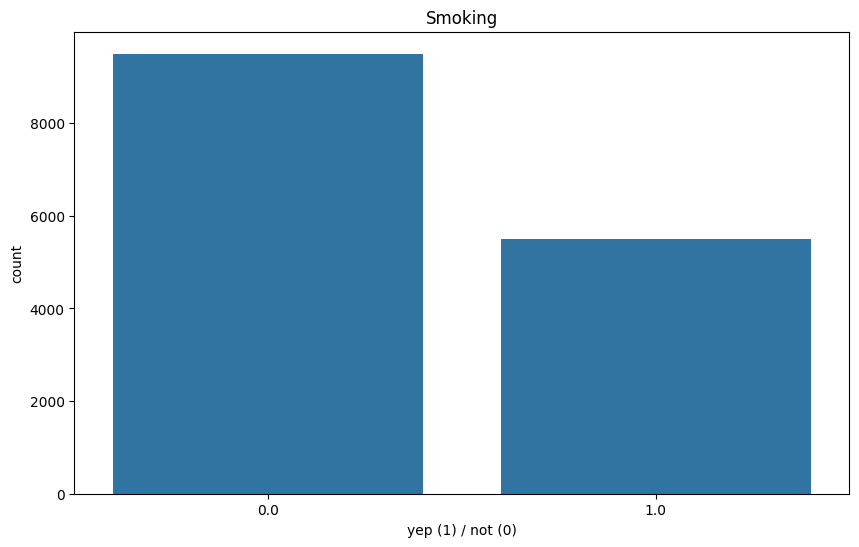

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking', data=train)
plt.title('Smoking')
plt.xlabel('yep (1) / not (0)')
plt.ylabel('count')
plt.show()

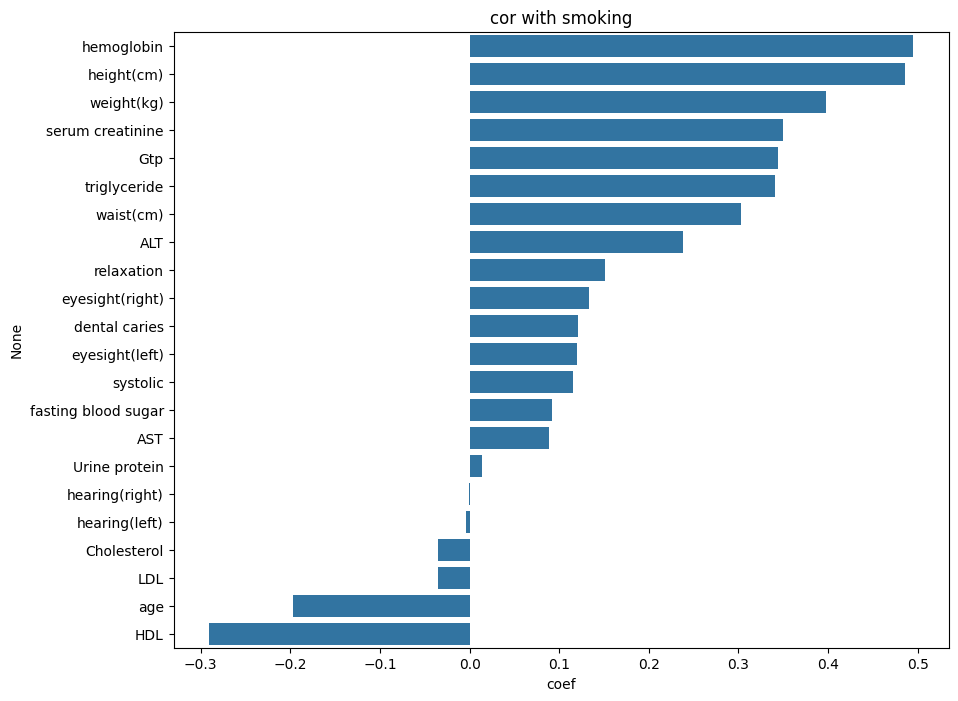

In [9]:
corr_with_target = train.drop(columns=['id']).corr()['smoking'].sort_values(ascending=False)[1:]
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('cor with smoking')
plt.xlabel('coef')
plt.show()

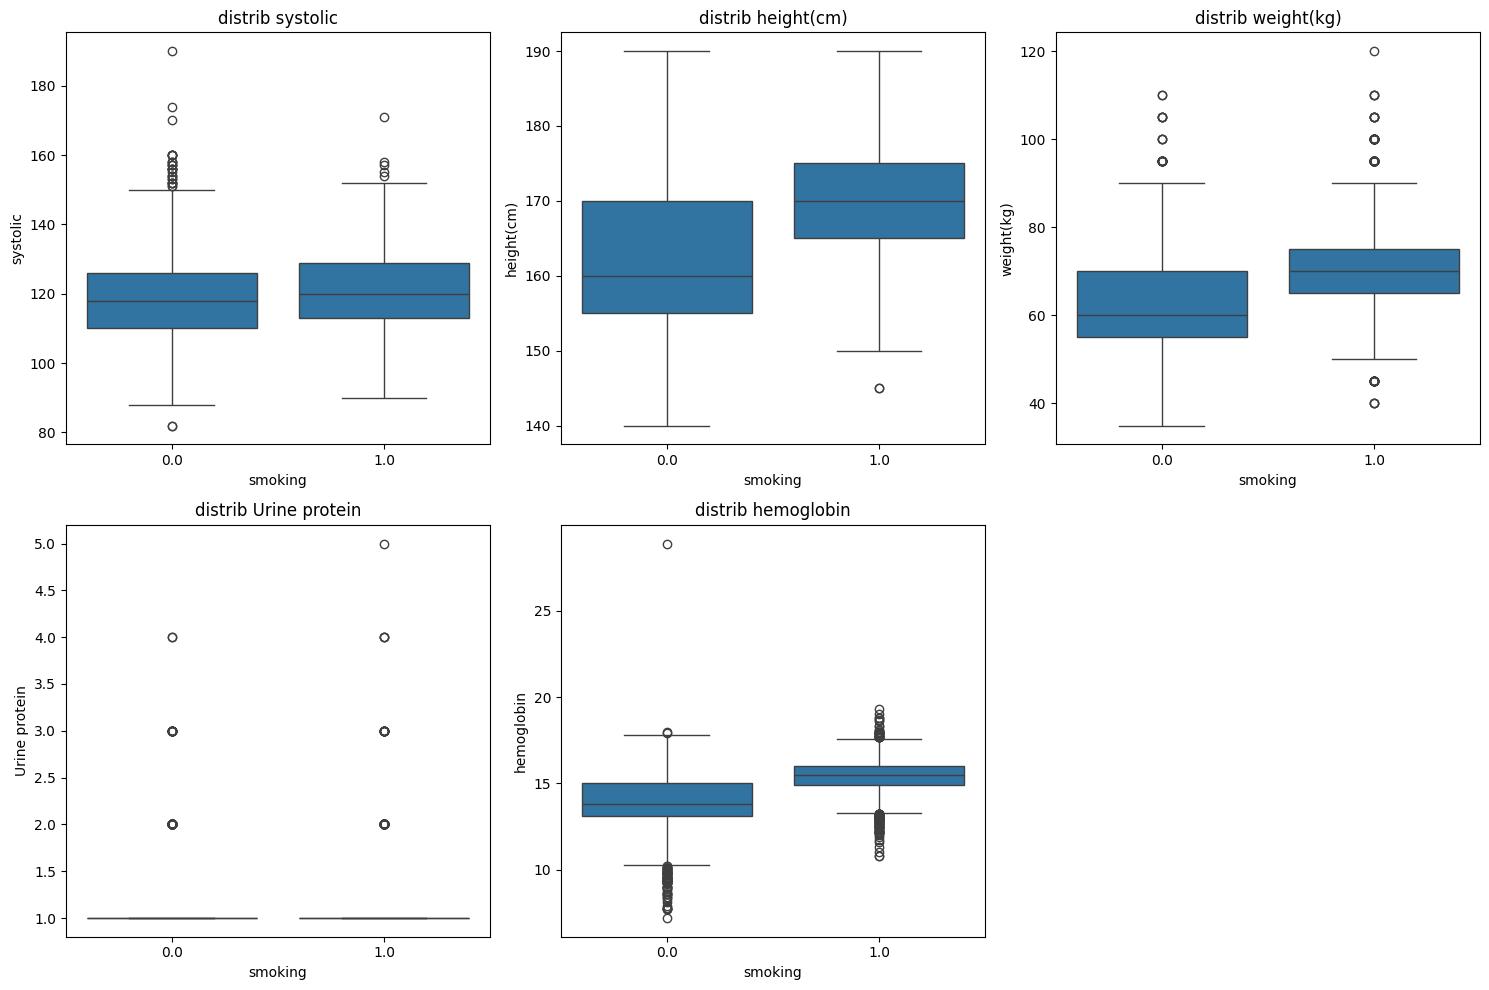

In [13]:
features = ['systolic', 'height(cm)', 'weight(kg)', 'Urine protein', 'hemoglobin']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='smoking', y=feature, data=train)
    plt.title(f'distrib {feature}')
plt.tight_layout()
plt.show()

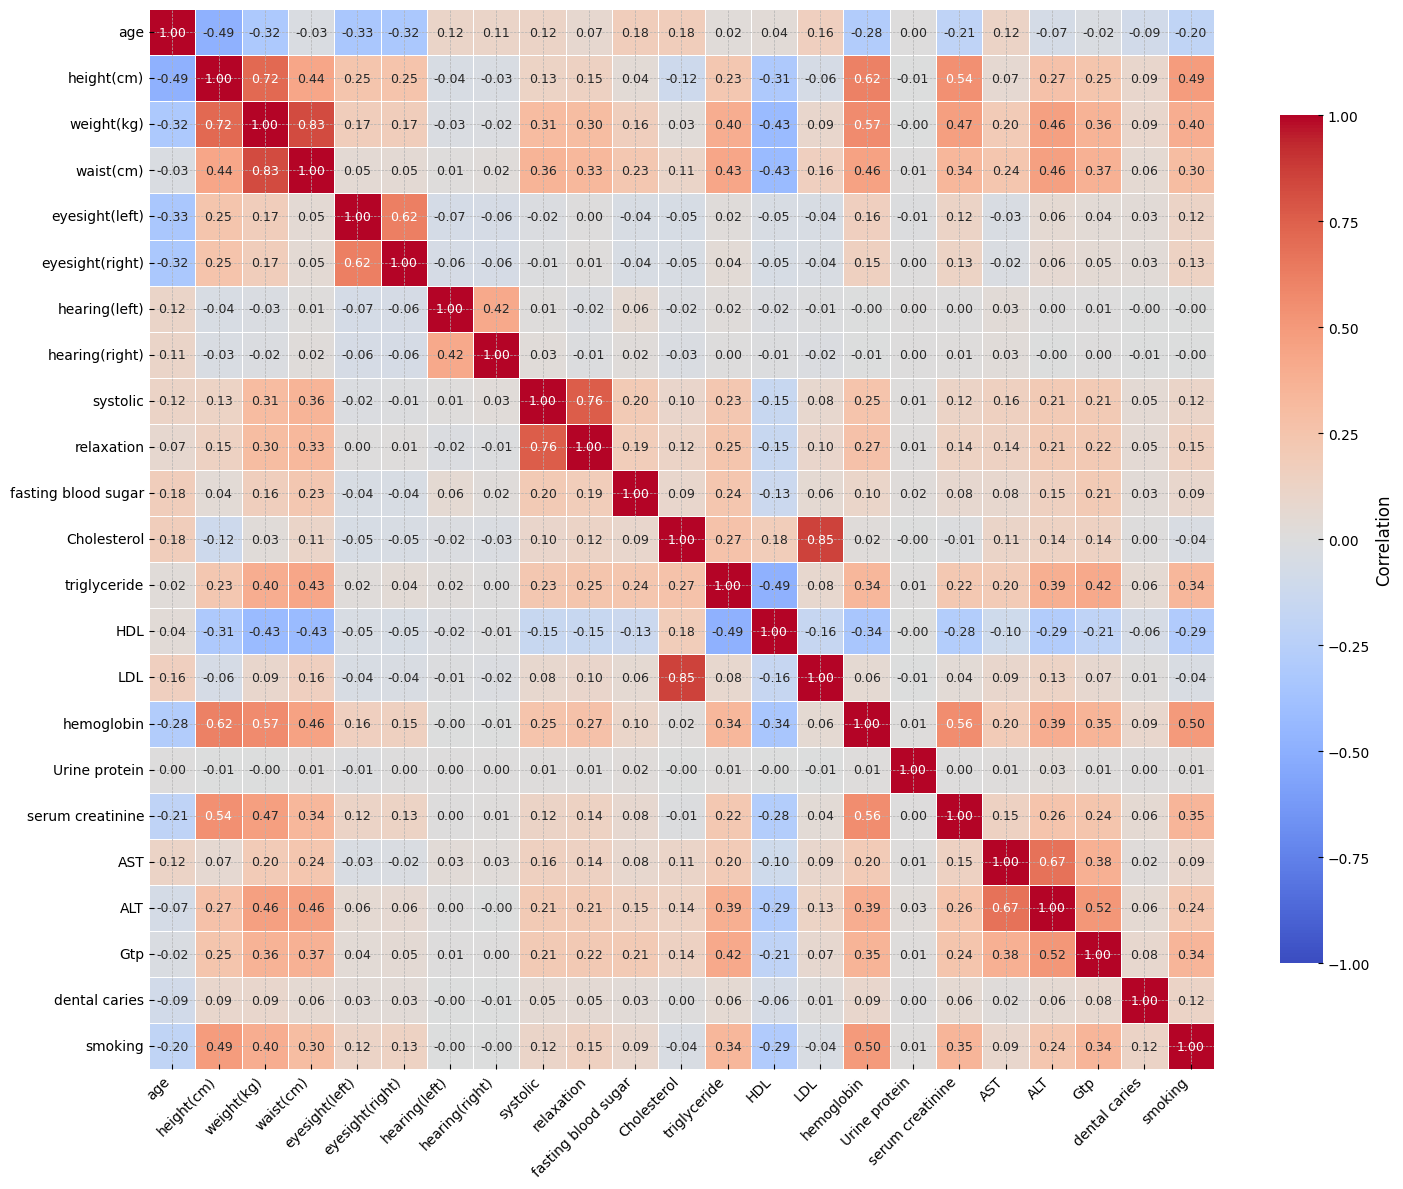

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.figure(figsize=(15, 12), dpi=100)

corr_matrix = train.drop(columns='id').corr()

heatmap = sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'},
    vmin=-1,
    vmax=1,
    annot_kws={'size': 9}
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

heatmap.set_facecolor('#f5f5f5')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.tight_layout()



plt.show()

In [15]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.utils import resample

class MyBaggingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=None, n_estimators=10, random_state=None):
        self.base_estimator = base_estimator if base_estimator else DecisionTreeClassifier()
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.estimators_ = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.estimators_ = []

        for _ in range(self.n_estimators):
            X_sample, y_sample = resample(X, y, random_state=self.random_state)
            estimator = clone(self.base_estimator)
            estimator.fit(X_sample, y_sample)
            self.estimators_.append(estimator)

        return self

    def predict(self, X):
        predictions = np.array([estimator.predict(X) for estimator in self.estimators_])
        predictions = predictions.astype(int)
        return np.array([np.bincount(predictions[:, i]).argmax()
                        for i in range(predictions.shape[1])])

    def predict_proba(self, X):
        probas = np.array([estimator.predict_proba(X)[:, 1] for estimator in self.estimators_])
        return np.mean(probas, axis=0)

In [28]:
class MyGradientBoostingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.models = []
        self.initial_pred = None
        self.classes_ = None

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.classes_ = np.unique(y)

        self.initial_pred = np.log(np.mean(y) / (1 - np.mean(y)))
        pred = np.full(len(y), self.initial_pred)

        for _ in range(self.n_estimators):
            residuals = y - self._sigmoid(pred)

            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X, residuals)

            pred += self.learning_rate * tree.predict(X)

            self.models.append(tree)

        return self

    def predict_proba(self, X):
        pred = np.full(X.shape[0], self.initial_pred)
        for model in self.models:
            pred += self.learning_rate * model.predict(X)
        proba = self._sigmoid(pred)
        return np.vstack([1-proba, proba]).T

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba > 0.5).astype(int)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [16]:
def accuracy_score(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  return (y_true == y_pred).sum() / y_true.shape[0]

def precision_score(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  tp = (y_true * y_pred).sum()
  fp = ((y_true == 0) * y_pred).sum()
  if tp + fp == 0:
    return 1
  return tp / (tp + fp)

def recall_score(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  tp = (y_true * y_pred).sum()
  fn = (y_true * (y_pred == 0)).sum()
  return tp / (tp + fn)

def f1_score(y_true, y_pred):
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  return 2 * precision * recall / (precision + recall)

def roc_auc_score(y_true, y_pred_proba):
  y_true = np.array(y_true)
  y_pred_proba = np.array(y_pred_proba)
  thresholds = (y_pred_proba[1:] + y_pred_proba[:-1]) / 2
  unique_indices = np.where(y_pred_proba[1:] != y_pred_proba[:-1])[0]

  thresholds = thresholds[unique_indices]
  thresholds = np.concat((thresholds, np.array([-float('inf'), float('inf')])));
  thresholds = np.sort(thresholds)

  fpr = np.ndarray(thresholds.shape)
  tpr = np.ndarray(thresholds.shape)

  for i in range(0, thresholds.shape[0]):
    y_pred = y_pred_proba > thresholds[i]
    tp = (y_true * y_pred).sum()
    fp = ((y_true == 0) * y_pred).sum()
    tn = ((y_true == 0) * (y_pred == 0)).sum()
    fn = (y_true * (y_pred == 0)).sum()

    fpr[i] = fp / (fp + tn)
    tpr[i] = tp / (tp + fn)

  return 0.5 * np.abs(((fpr[1:] - fpr[:-1]) * (tpr[:-1] + tpr[1:])).sum())

def pr_auc_score(y_true, y_pred_proba):
  y_true = np.array(y_true)
  y_pred_proba = np.array(y_pred_proba)
  thresholds = (y_pred_proba[1:] + y_pred_proba[:-1]) / 2
  unique_indices = np.where(y_pred_proba[1:] != y_pred_proba[:-1])[0]

  thresholds = thresholds[unique_indices]
  thresholds = np.concat((thresholds, np.array([-float('inf'), float('inf')])));
  thresholds = np.sort(thresholds)

  recalls = np.ndarray(thresholds.shape)
  precisions = np.ndarray(thresholds.shape)

  for i in range(0, thresholds.shape[0]):
    y_pred = y_pred_proba > thresholds[i]
    recalls[i] = recall_score(y_true, y_pred)
    precisions[i] = precision_score(y_true, y_pred)

  return 0.5 * np.abs(((recalls[1:] - recalls[:-1]) * (precisions[:-1] + precisions[1:])).sum())

In [26]:
from sklearn.tree import DecisionTreeClassifier

X_train = train.drop(columns='smoking')
y_train = train['smoking']

base_estimator = DecisionTreeClassifier(max_depth=3)
estimator = MyBaggingClassifier(base_estimator=base_estimator,
                              n_estimators=10,
                              random_state=42)
estimator.fit(X_train, y_train)

y_pred_proba = estimator.predict_proba(X_train)
y_pred = estimator.predict(X_train)
y_true = y_train

scores = ['Accuracy score', 'Precision score', 'Recall score', 'F1 score', 'ROC AUC', 'PR AUC']
p, r, _ = precision_recall_curve(y_true, y_pred_proba)
sk_pr_auc = auc(r, p)

data = [
    [sk.metrics.accuracy_score(y_true, y_pred), accuracy_score(y_true, y_pred)],
    [sk.metrics.precision_score(y_true, y_pred), precision_score(y_true, y_pred)],
    [sk.metrics.recall_score(y_true, y_pred), recall_score(y_true, y_pred)],
    [sk.metrics.f1_score(y_true, y_pred), f1_score(y_true, y_pred)],
    [sk.metrics.roc_auc_score(y_true, y_pred_proba), roc_auc_score(y_true, y_pred_proba)],
    [sk_pr_auc, pr_auc_score(y_true, y_pred_proba)]
]

results_df = pd.DataFrame(columns=['SkLearn', 'My implementation'],
                         index=scores,
                         data=data)
results_df

,SkLearn,My implementation
Accuracy score,0.744000,0.744000
Precision score,0.731510,0.731510
Recall score,0.476632,0.476632
F1 score,0.577186,0.577186
ROC AUC,0.837295,0.837295
PR AUC,0.751180,0.751180


In [39]:
import lightgbm as lgb
import xgboost as xgb


def compare_models(X_train, y_train, X_test, y_test):
    my_gb = MyGradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    my_gb.fit(X_train, y_train)
    my_pred = my_gb.predict(X_test)
    my_proba = my_gb.predict_proba(X_test)[:, 1]

    lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)
    lgb_proba = lgb_model.predict_proba(X_test)[:, 1]

    xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

    cb_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_seed=42, verbose=0)
    cb_model.fit(X_train, y_train)
    cb_pred = cb_model.predict(X_test)
    cb_proba = cb_model.predict_proba(X_test)[:, 1]

    models = {
        'MyGB': (my_pred, my_proba),
        'LightGBM': (lgb_pred, lgb_proba),
        'XGBoost': (xgb_pred, xgb_proba),
        'CatBoost': (cb_pred, cb_proba)
    }

    print(f"{'Model':<10} | {'Accuracy':<8} | {'LogLoss':<8} | {'AUC-ROC':<8}")
    print("-" * 45)
    for name, (pred, proba) in models.items():
        acc = accuracy_score(y_test, pred)
        ll = log_loss(y_test, proba)
        auc = roc_auc_score(y_test, proba)
        print(f"{name:<10} | {acc:.4f}    | {ll:.4f}    | {auc:.4f}")

X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

compare_models(X_train, y_train, X_test, y_test)

Model      | Accuracy | LogLoss  | AUC-ROC 
---------------------------------------------
MyGB       | 0.9295    | 0.2617    | 0.9705
LightGBM   | 0.9400    | 0.1830    | 0.9763
XGBoost    | 0.9400    | 0.1846    | 0.9759
CatBoost   | 0.9380    | 0.1868    | 0.9762


In [40]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 18.3 MB/s eta 0:00:00


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
import pandas as pd
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

train = pd.read_csv('train(2).csv')
test = pd.read_csv('test(2).csv')

X_train = train.drop(columns=['id', 'smoking'])
y_train = train['smoking']
X_test = test.drop(columns=['id'])


def objective(trial):
    params = params = {
        'iterations': trial.suggest_int('iterations', 1000, 3000),
        'depth': trial.suggest_int('depth', 6, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 20),
        'border_count': trial.suggest_int('border_count', 64, 255),
        'random_strength': trial.suggest_float('random_strength', 0.1, 1.5),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 50),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1)
    }

    model = CatBoostClassifier(**params)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, timeout=1200)

print("Лучшие гиперпараметры:")
best_params = study.best_params
print(best_params)

best_model = CatBoostClassifier(**best_params, verbose=100)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)


optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)

X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42
)

final_model = best_model

test_proba = final_model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'id': test['id'],
    'smoking': test_proba
})

print(f"Test IDs: {len(test['id'])}, Predictions: {len(test_proba)}")
assert len(test['id']) == len(test_proba), "Размеры не совпадают!"

submission.to_csv('submission.csv', index=False)

print(submission.head())

[I 2025-05-24 05:24:20,105] A new study created in memory with name: no-name-772d26f7-2f21-4caa-b0fe-a8cd35ffea15


Выходные данные были обрезаны до нескольких последних строк (5000).
104:	learn: 0.4298414	total: 9.3s	remaining: 3m 36s
105:	learn: 0.4291616	total: 9.38s	remaining: 3m 36s
106:	learn: 0.4283115	total: 9.45s	remaining: 3m 36s
107:	learn: 0.4276037	total: 9.52s	remaining: 3m 35s
108:	learn: 0.4267999	total: 9.61s	remaining: 3m 35s
109:	learn: 0.4260373	total: 9.68s	remaining: 3m 34s
110:	learn: 0.4252914	total: 9.77s	remaining: 3m 34s
111:	learn: 0.4246962	total: 9.84s	remaining: 3m 34s
112:	learn: 0.4239597	total: 9.91s	remaining: 3m 33s
113:	learn: 0.4233691	total: 9.99s	remaining: 3m 33s
114:	learn: 0.4227060	total: 10.1s	remaining: 3m 33s
115:	learn: 0.4221152	total: 10.1s	remaining: 3m 33s
116:	learn: 0.4216467	total: 10.2s	remaining: 3m 32s
117:	learn: 0.4211284	total: 10.3s	remaining: 3m 32s
118:	learn: 0.4206419	total: 10.4s	remaining: 3m 31s
119:	learn: 0.4199305	total: 10.4s	remaining: 3m 31s
120:	learn: 0.4192421	total: 10.5s	remaining: 3m 31s
121:	learn: 0.4187880	total: 10.

[I 2025-05-24 05:43:11,347] Trial 0 finished with value: 0.8013999999999999 and parameters: {'iterations': 2552, 'depth': 11, 'learning_rate': 0.010691902089380203, 'l2_leaf_reg': 17.39421232385735, 'border_count': 250, 'random_strength': 1.3372547254553866, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 26, 'bagging_temperature': 0.9228991612652683}. Best is trial 0 with value: 0.8013999999999999.


Выходные данные были обрезаны до нескольких последних строк (5000).
979:	learn: 0.2286673	total: 17.2s	remaining: 17.8s
980:	learn: 0.2285545	total: 17.3s	remaining: 17.8s
981:	learn: 0.2285108	total: 17.3s	remaining: 17.8s
982:	learn: 0.2284374	total: 17.3s	remaining: 17.8s
983:	learn: 0.2283326	total: 17.3s	remaining: 17.7s
984:	learn: 0.2282244	total: 17.3s	remaining: 17.7s
985:	learn: 0.2281490	total: 17.3s	remaining: 17.7s
986:	learn: 0.2280117	total: 17.4s	remaining: 17.7s
987:	learn: 0.2279106	total: 17.4s	remaining: 17.7s
988:	learn: 0.2277936	total: 17.4s	remaining: 17.6s
989:	learn: 0.2276806	total: 17.4s	remaining: 17.6s
990:	learn: 0.2275968	total: 17.4s	remaining: 17.6s
991:	learn: 0.2274526	total: 17.4s	remaining: 17.6s
992:	learn: 0.2273091	total: 17.4s	remaining: 17.6s
993:	learn: 0.2271533	total: 17.4s	remaining: 17.5s
994:	learn: 0.2270429	total: 17.5s	remaining: 17.5s
995:	learn: 0.2268597	total: 17.5s	remaining: 17.5s
996:	learn: 0.2266795	total: 17.5s	remaining: 17

[I 2025-05-24 05:46:04,465] Trial 1 finished with value: 0.8010666666666667 and parameters: {'iterations': 1993, 'depth': 8, 'learning_rate': 0.022696472005099912, 'l2_leaf_reg': 6.083618202841521, 'border_count': 140, 'random_strength': 0.7163145887975734, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 16, 'bagging_temperature': 0.1272927827754281}. Best is trial 0 with value: 0.8013999999999999.


Лучшие гиперпараметры:
{'iterations': 2552, 'depth': 11, 'learning_rate': 0.010691902089380203, 'l2_leaf_reg': 17.39421232385735, 'border_count': 250, 'random_strength': 1.3372547254553866, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 26, 'bagging_temperature': 0.9228991612652683}
0:	learn: 0.6861312	total: 140ms	remaining: 5m 56s
100:	learn: 0.4286332	total: 8.08s	remaining: 3m 15s
200:	learn: 0.3842782	total: 17.4s	remaining: 3m 23s
300:	learn: 0.3607316	total: 26.3s	remaining: 3m 16s
400:	learn: 0.3445319	total: 35.6s	remaining: 3m 10s
500:	learn: 0.3319024	total: 46.2s	remaining: 3m 9s
600:	learn: 0.3207762	total: 56.6s	remaining: 3m 3s
700:	learn: 0.3114422	total: 1m 6s	remaining: 2m 56s
800:	learn: 0.3013622	total: 1m 15s	remaining: 2m 45s
900:	learn: 0.2920007	total: 1m 26s	remaining: 2m 37s
1000:	learn: 0.2837125	total: 1m 36s	remaining: 2m 29s
1100:	learn: 0.2763309	total: 1m 45s	remaining: 2m 19s
1200:	learn: 0.2696579	total: 1m 53s	remaining: 2m 7s
1300:	learn: 0.2635

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import optuna
from catboost import CatBoostClassifier
import joblib

train = pd.read_csv('train(2).csv')
test = pd.read_csv('test(2).csv')

def advanced_preprocessing(df, train_df=None, is_train=True):
    df = df.copy()

    if is_train or train_df is not None:
        df['BMI'] = df['weight(kg)'] / (df['height(cm)']/100)**2
        df['Waist_Height_Ratio'] = df['waist(cm)'] / df['height(cm)']
        df['BP_Ratio'] = df['systolic'] / df['relaxation']
        df['AST_ALT_Ratio'] = df['AST'] / df['ALT']
        df['Total_Chol/HDL'] = df['Cholesterol'] / df['HDL']

    numeric_cols = [col for col in df.select_dtypes(include=np.number).columns
                   if col not in ['id', 'smoking']]

    if is_train:
        scaler = RobustScaler()
        df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    elif train_df is not None:
        scaler = RobustScaler()
        train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
        df[numeric_cols] = scaler.transform(df[numeric_cols])

    return df

print("Обработка данных...")
train_processed = advanced_preprocessing(train)
X_test = advanced_preprocessing(test, train_processed, is_train=False)

X = train_processed.drop(['id', 'smoking'], axis=1)
y = train_processed['smoking']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
selected_features = X_train.columns[selector.get_support()]
print("\nОтобранные признаки:", list(selected_features))

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 1e-8, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 10),
        'verbose': False,
        'random_state': 42,
        'auto_class_weights': 'Balanced'
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train_selected, y_train)
    val_preds = model.predict_proba(X_val_selected)[:, 1]
    return roc_auc_score(y_val, val_preds)

print("\nНачинаем подбор гиперпараметров с Optuna...")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=2, timeout=3600)

best_params = study.best_params
print("\nЛучшие параметры:", best_params)
final_model = CatBoostClassifier(**best_params, verbose=100)
final_model.fit(X_train_selected, y_train)

val_preds = final_model.predict_proba(X_val_selected)[:, 1]
val_score = roc_auc_score(y_val, val_preds)
print(f"\nROC-AUC на валидации: {val_score:.4f}")

print("\nФинальное обучение на всех данных...")
X_selected = selector.fit_transform(X, y)
final_model.fit(X_selected, y)

joblib.dump(final_model, 'final_catboost_model.pkl')
joblib.dump(selector, 'feature_selector.pkl')
print("\nМодель и селектор признаков сохранены")

print("\nСоздание предсказаний...")
X_test_selected = selector.transform(X_test.drop('id', axis=1))
test_preds = final_model.predict_proba(X_test_selected)[:, 1]

submission = pd.DataFrame({'id': test['id'], 'smoking': test_preds})
submission.to_csv('submission.csv', index=False)

print("\nПервые 5 предсказаний:")
print(submission.head())
print("\nФайл submission.csv успешно сохранен")

[I 2025-05-23 22:57:24,297] A new study created in memory with name: no-name-e684490d-0a00-4e92-a36c-c029e57823a3


Обработка данных...

Отобранные признаки: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(right)', 'relaxation', 'triglyceride', 'HDL', 'hemoglobin', 'serum creatinine', 'ALT', 'Gtp', 'BMI', 'AST_ALT_Ratio', 'Total_Chol/HDL']

Начинаем подбор гиперпараметров с Optuna...


[I 2025-05-23 22:57:26,570] Trial 0 finished with value: 0.878592822966507 and parameters: {'iterations': 142, 'learning_rate': 0.1495398879256689, 'depth': 4, 'l2_leaf_reg': 1.154113048894503e-08, 'border_count': 188, 'random_strength': 6.097289031070361, 'bagging_temperature': 0.3369964778514659, 'leaf_estimation_iterations': 8}. Best is trial 0 with value: 0.878592822966507.
[I 2025-05-23 22:57:34,950] Trial 1 finished with value: 0.876856937799043 and parameters: {'iterations': 567, 'learning_rate': 0.04776929935498541, 'depth': 7, 'l2_leaf_reg': 5.019065792254162e-07, 'border_count': 179, 'random_strength': 7.176202357391197, 'bagging_temperature': 0.716029349956861, 'leaf_estimation_iterations': 7}. Best is trial 0 with value: 0.878592822966507.



Лучшие параметры: {'iterations': 142, 'learning_rate': 0.1495398879256689, 'depth': 4, 'l2_leaf_reg': 1.154113048894503e-08, 'border_count': 188, 'random_strength': 6.097289031070361, 'bagging_temperature': 0.3369964778514659, 'leaf_estimation_iterations': 8}
0:	learn: 0.6173582	total: 3.97ms	remaining: 560ms
100:	learn: 0.3810236	total: 356ms	remaining: 145ms
141:	learn: 0.3618706	total: 518ms	remaining: 0us

ROC-AUC на валидации: 0.8763

Финальное обучение на всех данных...
0:	learn: 0.6133058	total: 4.29ms	remaining: 605ms
100:	learn: 0.3872294	total: 387ms	remaining: 157ms
141:	learn: 0.3704786	total: 549ms	remaining: 0us

Модель и селектор признаков сохранены

Создание предсказаний...

Первые 5 предсказаний:
      id   smoking
0  15000  0.947982
1  15001  0.947982
2  15002  0.944149
3  15003  0.947982
4  15004  0.989867

Файл submission.csv успешно сохранен


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('train(2).csv')
test = pd.read_csv('test(2).csv')

print("Распределение целевой переменной:")
print(train['smoking'].value_counts(normalize=True))

def advanced_preprocessing(df, train_df=None, is_train=True):
    df = df.copy()

    if is_train or train_df is not None:
        df['BMI'] = df['weight(kg)'] / (df['height(cm)']/100)**2
        df['Waist_Height_Ratio'] = df['waist(cm)'] / df['height(cm)']
        df['BP_Ratio'] = df['systolic'] / df['relaxation']
        df['AST_ALT_Ratio'] = df['AST'] / df['ALT']
        df['Total_Chol/HDL'] = df['Cholesterol'] / df['HDL']

    numeric_cols = [col for col in df.select_dtypes(include=np.number).columns
                   if col not in ['id', 'smoking']]

    if is_train:
        scaler = RobustScaler()
        df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    elif train_df is not None:
        scaler = RobustScaler()
        train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
        df[numeric_cols] = scaler.transform(df[numeric_cols])

    return df

train_processed = advanced_preprocessing(train)
X_test = advanced_preprocessing(test, train_processed, is_train=False)

X = train_processed.drop(['id', 'smoking'], axis=1)
y = train_processed['smoking']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
selected_features = X_train.columns[selector.get_support()]
print("\nОтобранные признаки:", list(selected_features))

param_distributions = {
    'LightGBM': {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(3, 10),
        'num_leaves': randint(10, 50),
        'reg_alpha': uniform(0, 1),
        'reg_lambda': uniform(0, 1)
    },
    'XGBoost': {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(3, 10),
        'subsample': uniform(0.5, 0.5),
        'colsample_bytree': uniform(0.5, 0.5),
        'gamma': uniform(0, 1)
    },
    'CatBoost': {
        'iterations': randint(100, 500),
        'learning_rate': uniform(0.01, 0.3),
        'depth': randint(4, 10),
        'l2_leaf_reg': uniform(1, 10)
    }
}

best_models = {}
for name, params in param_distributions.items():
    print(f"\nОптимизация {name}...")
    if name == 'LightGBM':
        model = LGBMClassifier(random_state=42, n_jobs=-1)
    elif name == 'XGBoost':
        model = XGBClassifier(random_state=42, n_jobs=-1, eval_metric='auc')
    elif name == 'CatBoost':
        model = CatBoostClassifier(random_state=42, verbose=0)

    search = RandomizedSearchCV(
        model, params, n_iter=20, scoring='roc_auc',
        cv=3, n_jobs=-1, random_state=42)
    search.fit(X_train_selected, y_train)

    best_models[name] = search.best_estimator_
    val_score = roc_auc_score(y_val, search.best_estimator_.predict_proba(X_val_selected)[:, 1])
    print(f"Лучшие параметры: {search.best_params_}")
    print(f"ROC-AUC на валидации: {val_score:.4f}")

print("\nСоздание стекинга...")
estimators = [
    ('lgbm', best_models['LightGBM']),
    ('xgb', best_models['XGBoost']),
    ('cat', best_models['CatBoost'])
]

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=CatBoostClassifier(iterations=100, learning_rate=0.05,
                                     depth=5, random_state=42, verbose=0),
    n_jobs=-1)

stacking.fit(X_train_selected, y_train)
stacking_score = roc_auc_score(y_val, stacking.predict_proba(X_val_selected)[:, 1])
print(f"ROC-AUC стекинга на валидации: {stacking_score:.4f}")

if stacking_score > max([roc_auc_score(y_val, m.predict_proba(X_val_selected)[:, 1]) for m in best_models.values()]):
    final_model = stacking
    print("\nВыбран ансамбль как финальная модель")
else:
    best_name = max(best_models, key=lambda x: roc_auc_score(y_val, best_models[x].predict_proba(X_val_selected)[:, 1]))
    final_model = best_models[best_name]
    print(f"\nВыбрана {best_name} как финальная модель")

X_selected = selector.fit_transform(X, y)
final_model.fit(X_selected, y)

X_test_selected = selector.transform(X_test.drop('id', axis=1))
test_preds = final_model.predict_proba(X_test_selected)[:, 1]

submission = pd.DataFrame({'id': test['id'], 'smoking': test_preds})
submission.to_csv('submission.csv', index=False)
print("\nФайл submission.csv сохранен")


## это решение чисто для себя

Распределение целевой переменной:
smoking
0.0    0.6334
1.0    0.3666
Name: proportion, dtype: float64

Отобранные признаки: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(right)', 'relaxation', 'triglyceride', 'HDL', 'hemoglobin', 'serum creatinine', 'ALT', 'Gtp', 'BMI', 'AST_ALT_Ratio', 'Total_Chol/HDL']

Оптимизация LightGBM...


KeyboardInterrupt: 